# Selección de cripto activos para una cartera de inversión

# Trabajo Práctico 2 -  Análisis y Curación

## Introducción


A lo largo de este práctico continuaremos con la exploración del dataset iniciada en el práctio anterior, donde notamos algunas características propias de las series temporales. 
Además, vimos que no se trata de series estacionarias y en nuestro caso no apreciamos patrones de estacionalidad para la serie de tiempo de los precios.

En la siguiente notebook, se presentan las actividades relacionadas a Análisis y Curación. Buscamos identificar e implementar los pasos necesarios para la limpieza de la base de datos, así como también analizar cruces de datos con mayor profundidad. Para esto, los invito a chequear la siguiente [lista](https://dimewiki.worldbank.org/Checklist:_Data_Cleaning), donde se muestran una serie de puntos a tener en cuenta a la hora de tratar nuestros datos.

#### Variables

- __Fecha__: se la usa como índice del _pandasDataFrame_.

#### Activos ( con sus respectivos precios OHLC ):

Todos los activos están expresados en una misma moneda, *quote*, que en nuestro caso es USDT ( un token de USD )

- __BTCUSDT__
- __ETHUSDT__
- __BNBUSDT__
- __ADAUSDT__
- __DOTUSDT__
- __BCHUSDT__
- __LTCUSDT__
- __LINKUSDT__
- __ETCUSDT__
- __EOSUSDT__
- __XMRUSDT__
- __NEOUSDT__
- __AAVEUSDT__
- __MKRUSDT__
- __COMPUSDT__
- __DASHUSDT__


#### ¿Cuándo opera el mercado?

Este es un mercado que trabaja 24/7, es decir, está operando constantemente. En cada caso tenemos datos por hora (por lo tanto, una sesión equivale a una hora) de los diferentes precios **OHLC** de cada activo y el volumen, a saber:

- **OPEN :** precio al cual abre el activo, en la sesión.
- **HIGH :** mayor precio alcanzado por el activo en la sesión.
- **LOW :** menor precio alcanzado por el activo en la sesión.
- **CLOSE :** precio del activo al momento de cerrar la sesión. 
- **VOLUMEN :** cantidad del activo operado en la sesión.

Para conocer más sobre estos proyectos, pueden visitar la página [CoinMarketCap](https://coinmarketcap.com/). Allí encontrarán datos interesantes sobre cada par, su posición en el mercado, nacimiento de cada proyecto, entre otros.

# ¡Actividades!


Recuerden que la ciencia de datos es un proceso no lineal y continuo, es decir, si los datos requieren de mayor procesamiento para satisfacer las necesidades de algoritmos de machine learning, vamos a volver a la etapa inicial para, por ejemplo, crear nuevas features, tomar decisiones diferentes sobre valores faltantes o valores atípicos (outliers), descartar features, entre otras. ¡Manos a la obra!

Recomendación: Traten de crear funciones de manera de automatizar la mayor cantidad de pasos posibles. 

## Parte I 

- Indaguen sobre la existencia de valores faltantes. Diferencien entre datos perdidos e inexistentes. Seleccionen un activo y visualicen utilizando la librería Missingno ¿Si uno de los precios falta, también faltan los datos en las demás columnas? ¿Cuál creen que sería la mejor forma de tratarlos? ¿Por qué? Analicen formas de computarlos (por ejemplo, splines). 
**Para discutir:** ¿Cuáles podrían ser las razones de la falta de datos, si es que esto ocurre?


- ¿Hay índices repetidos? Resuelvan. 


- Para aprovechar en mayor medida los datos disponibles, analicen dividir los datos en dos posibles conjuntos de acuerdo a la disponibilidad de información según fechas.


- ¿Podría mejorarse la forma en la que está presentada la información? Recuerden que serán necesarios todos los precios de los activos para el cálculo de features. 


- Seleccionen un activo (y alguna de las columnas referidos a precios) y confeccionen un diagrama de dispersión entre el mismo y su valor retardado un período. Repita el mismo procedimiento con sus valores retardado 2, 3 y 4 períodos. 


- Grafiquen e interpreten las funciones de autocorrelación (ACF) y autocorrelación parcial (PACF), para el precio del activo elegido en el punto anterior. El siguiente [link](https://machinelearningmastery.com/gentle-introduction-autocorrelation-partial-autocorrelation/) puede ser útil para introducirlos en el tema.


## Parte II 

En esta instancia trabajaremos con algunos features extras que iremos generando a partir de los precios disponibles. Para ello los invito a investigar [talib](http://mrjbq7.github.io/ta-lib/doc_index.html), una de las librerías de python para análisis técnico. 

- Agreguen la serie de tasas de rendimiento para el precio close de cada activo. 


- Calculen las medias móviles de los precios tomando n periodos hacia atrás. 


- ¿Conocen algunos indicadores técnicos? Entre los más conocidos podemos mencionar: [RSI](https://admiralmarkets.com/es/education/articles/forex-indicators/como-sacar-beneficio-del-indicador-de-trading-rsi), [MADC](https://admiralmarkets.com/es/education/articles/forex-indicators/macd), [ADX](https://economipedia.com/definiciones/indicador-adx-average-directional-index.html), etc... Pueden construirlos o calcularlos a partir de la librería.


- Además, pueden crear indicadores personalizados, que ayudarán a que la predicción sea más precisa. Por ejemplo:


```
# Calculate 3 day moving average of close prices
df['S_3'] = df['close'].shift(1).rolling(window=3).mean()

# Calculate 15 day moving average of close prices
df['S_15'] = df['close'].shift(1).rolling(window=15).mean()

# Calculate 60 day moving average of close prices
df['S_60'] = df['close'].shift(1).rolling(window=60).mean()

# Calculate the correlation between close price and 3 day moving average
df['Corr'] = df['close'].shift(1).rolling(window=10).corr(df['S_3'].shift(1))

df['Std_U'] = df['high']-df['open']
df['Std_D'] = df['open']-df['low']

df['OD'] = df['open']-df['open'].shift(1)
df['OL'] = df['open']-df['close'].shift(1)
```
entre otros, S_3, S_15 y S_60 corresponde a las medias móviles de 3, 15 y 60 periodos. Además, se calcula la correlación entre los precios de cierre y la media móvil de 3 periodos  

**¿Qué roll cumple la función shift()? ¿Es necesario aplicarla en todos los features que calculamos?**


## Parte III

- Si por ejemplo, una característica tiene una varianza de un orden de magnitud mayor que la de las otras características, podría dominar la función objetivo y hacer que el estimador no pueda aprender de otras características correctamente como se esperaba. Para lograr esto se debe llevar a cabo un escalado o normalizado de datos. ¿Cuál es la diferencia? ¿Cuál elegirían aplicar?

## Parte IV - Opcional

- Para alguno/s de los activos, detecte las correlaciones entre los features generados utilizando la función Heatmap().




**¡Recuerde!** 

Nunca Modificar los Datos Crudos u Originales Al finalizar la limpieza, deberán guardar el dataset resultante, para asegurarse de no modificar los datos originales.

# Fecha de entrega

- __Versión preliminar: 1/7__ 

- __Versión final: 4/7__

# Condiciones de entrega

Realizar un informe en el cual se presenten los resultados y conclusiones del análisis desarrollado. El mismo debe estar pensado para un público técnico pero que desconoce los aspectos propios del problema a resolver. Dicho informe puede ser un notebook, a condición de que en el mismo se efectúe un análisis escrito suficientemente detallado de los resultados. 

### Carga del dataset

Primero, comenzamos importando las librerías necesarias. Luego, cargaremos un único dataset, pero recuerden que en la carpeta **data** tenemos un dataset por cada activo disponible.

In [ ]:
import pandas as pd
import numpy as np
import os
import re
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [ ]:
##Abrir todos los Data Set de criptomonedas y hacer un solo data frame agregando una columna que lo identifica
df=pd.DataFrame()  

#Url donde se encuentran los datos
url = 'https://github.com/charly3d/Diplomatura-de-Datos-Mentoria/blob/main/data/'             

#Listado con los nombres de los criptoactivos que figuran en el url
t = requests.get(url).text                                                                    
criptoactivos = re.findall(r'data/(\w+)\.csv', t)      

#Url Raw para poder levantar los datos
url2='https://raw.githubusercontent.com/charly3d/Diplomatura-de-Datos-Mentoria/main/data/'   

#Por cada cripto activo en la lista crea un dataframe, le agrega una columna con el nombre del cripto y los concatena                                                                          
for c in criptoactivos:                                                                       
  dfcripto=pd.read_csv(url2 + c+'.csv',index_col=0, parse_dates=True, dayfirst= True)
  dfcripto.loc[:,'cripto_activo']=c
  df = pd.concat([df,dfcripto],axis=0)

df_all=df.copy()


In [ ]:
df_all.head()

,open,close,high,low,volume,cripto_activo
2018-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,AAVEUSDT
2018-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,AAVEUSDT
2018-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,AAVEUSDT
2018-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN,AAVEUSDT
2018-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,AAVEUSDT


In [ ]:
df_all.tail()

,open,close,high,low,volume,cripto_activo
2021-05-16 11:00:00,402.23,398.90,404.47,397.26,4005.66944,XMRUSDT
2021-05-16 12:00:00,399.12,393.94,401.34,393.18,3907.98362,XMRUSDT
2021-05-16 13:00:00,393.65,398.16,398.64,391.34,3962.75618,XMRUSDT
2021-05-16 14:00:00,398.03,393.24,399.40,390.54,3418.55213,XMRUSDT
2021-05-16 15:00:00,393.02,390.40,393.19,385.91,2479.33209,XMRUSDT


#**PARTE I -  RESOLUCIÓN**

## Análisis división de los datos

Obtendremos las fechas mínimas a partir de la cual cada moneda presenta datos. 

In [ ]:
#creamos un dataframe para mostrar por cada moneda la fecha minima y máxima de sus observaciones (con valores para todas las columnas)
df_period_crypto = pd.DataFrame(columns=['crypto_activo', 'date_min', 'date_max'])

for i in df['cripto_activo'].unique():
    f_min=df[(df['cripto_activo']==i)& (pd.notnull(df['open'])) & (pd.notnull(df['close']))& (pd.notnull(df['high']))& (pd.notnull(df['low']))& (pd.notnull(df['volume']))].index.min()
    f_max=df[(df['cripto_activo']==i)& (pd.notnull(df['open'])) & (pd.notnull(df['close']))& (pd.notnull(df['high']))& (pd.notnull(df['low']))& (pd.notnull(df['volume']))].index.max()
    df_period_crypto = df_period_crypto.append({'crypto_activo': i, 'date_min':f_min, 'date_max':f_max}, ignore_index=True)   

df_period_crypto=df_period_crypto.sort_values('date_min',ascending=False)

df_period_crypto

,crypto_activo,date_min,date_max
0,AAVEUSDT,2020-10-15 03:00:00,2021-05-16 15:00:00
7,DOTUSDT,2020-08-18 23:00:00,2021-05-16 15:00:00
13,MKRUSDT,2020-07-23 14:00:00,2021-05-16 15:00:00
5,COMPUSDT,2020-06-25 06:00:00,2021-05-16 15:00:00
2,BCHUSDT,2019-11-28 10:00:00,2021-05-16 15:00:00
6,DASHUSDT,2019-03-28 04:00:00,2021-05-16 15:00:00
15,XMRUSDT,2019-03-15 04:00:00,2021-05-16 15:00:00
11,LINKUSDT,2019-01-16 10:00:00,2021-05-16 15:00:00
9,ETCUSDT,2018-06-12 02:00:00,2021-05-16 15:00:00
8,EOSUSDT,2018-05-28 05:00:00,2021-05-16 15:00:00


**Como podemos observar, para un determinado activo, la fecha mínima obtenida define el punto de partida de las observaciones, de manera que para una fecha anterior los datos son INEXISTENTES.**

Vamos a dividir los datos en dos subconjuntos, uno con las monedas que presentan datos desde el año 2018 y un segundo conjunto con las monedas que presentan datos a partir de 2019.

In [ ]:
list_group1=list(df_period_crypto[(df_period_crypto['date_min']< '2019-01-01 00:00:00')].sort_values('date_min',ascending=False)['crypto_activo'])
print('1º Conjunto de monedas es: ',list_group1)


1º Conjunto de monedas es:  ['ETCUSDT', 'EOSUSDT', 'ADAUSDT', 'BNBUSDT', 'BTCUSDT', 'ETHUSDT', 'LTCUSDT', 'NEOUSDT']


In [ ]:
list_group2=list(df_period_crypto[(df_period_crypto['date_min']> '2019-01-01 00:00:00')].sort_values('date_min',ascending=False)['crypto_activo'])
print('2º Conjunto de monedas es: ',list_group2 )

2º Conjunto de monedas es:  ['AAVEUSDT', 'DOTUSDT', 'MKRUSDT', 'COMPUSDT', 'BCHUSDT', 'DASHUSDT', 'XMRUSDT', 'LINKUSDT']


Creamos los dos dataframes para luego trabajar con ellos.


In [ ]:
df_columns=['open',	'close'	,'high',	'low'	,'volume',	'cripto_activo']

df_group1=pd.DataFrame(columns=df_columns)
df_group2=pd.DataFrame(columns=df_columns)

###**PRIMER DATAFRAME**

Teniendo en cuenta lo expuesto, procedemos a análizar nuestros datos.
Creamos el data frame con el primer grupo de monedas.

In [ ]:
#Creo dataframe con el primer grupo de monedas                                                                         
for c in list_group1:                                                                       
  dfcripto=pd.read_csv(url2 + c+'.csv',index_col=0, parse_dates=True, dayfirst=True)
  dfcripto.loc[:,'cripto_activo']=c
  df_group1 = pd.concat([df_group1,dfcripto],axis=0)


Reordenamos el indice del dataframe.

In [ ]:
df_group1=df_group1.sort_index()

In [ ]:
df_group1[:10]

,open,close,high,low,volume,cripto_activo
2018-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,ETCUSDT
2018-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,EOSUSDT
2018-01-01 00:00:00,733.0100,727.6200,734.5200,720.030,2105.901000,ETHUSDT
2018-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,ADAUSDT
2018-01-01 00:00:00,74.8540,72.5650,75.0720,71.050,4880.223000,NEOUSDT
2018-01-01 00:00:00,223.6900,219.9800,223.6900,217.250,978.117780,LTCUSDT
2018-01-01 00:00:00,13715.6500,13529.0100,13715.6500,13400.010,443.356199,BTCUSDT
2018-01-01 00:00:00,8.5478,8.3559,8.5478,8.246,49487.140000,BNBUSDT
2018-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,EOSUSDT
2018-01-01 01:00:00,727.0100,717.9700,732.0000,716.800,2305.970860,ETHUSDT


Para tratar los índice repetidos decidimos usar un **multi index**, seleccionando las columnas **"cripto_activo"** y **"date"** como indices conjuntos.

In [ ]:
# Set multi index
df_group1=df_group1.reset_index()
df_group1.rename(columns={'index':'date'},inplace=True)
df_group1.set_index(['cripto_activo','date'],inplace=True)

df_group1


,,open,close,high,low,volume
cripto_activo,date,,,,,
ETCUSDT,2018-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN
EOSUSDT,2018-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN
ETHUSDT,2018-01-01 00:00:00,733.0100,727.6200,734.5200,720.0300,2.105901e+03
ADAUSDT,2018-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN
NEOUSDT,2018-01-01 00:00:00,74.8540,72.5650,75.0720,71.0500,4.880223e+03
...,...,...,...,...,...,...
ADAUSDT,2021-05-16 15:00:00,2.3186,2.2943,2.3196,2.2632,2.589700e+07
EOSUSDT,2021-05-16 15:00:00,10.4295,10.4335,10.5052,10.3000,1.175139e+06
ETCUSDT,2021-05-16 15:00:00,97.2000,97.0260,97.4980,95.4760,1.639789e+05


Algunas formas de consultar los datos con un nultiindex son las siguientes.

* Seleccionamos una determinada fecha para ver las entradas de una moneda especifica.

In [ ]:
df_group1.loc[('ETCUSDT','2018-01-01 00:00:00', )]

open     NaN
close    NaN
high     NaN
low      NaN
volume   NaN
Name: (ETCUSDT, 2018-01-01 00:00:00), dtype: float64

* Seleccionamos todas las entradas de una monedas sin determinar fecha.


In [ ]:
df_group1.loc['BNBUSDT' , :]
#df_group1.loc[(df_group1.index.get_level_values('cripto_activo') == 'ETCUSDT')]

,open,close,high,low,volume
date,,,,,
2018-01-01 00:00:00,8.5478,8.3559,8.5478,8.2460,49487.1400
2018-01-01 01:00:00,8.3558,8.2199,8.3997,8.1305,24992.6300
2018-01-01 02:00:00,8.2200,8.2235,8.3488,8.2020,28933.0000
2018-01-01 03:00:00,8.2972,8.3401,8.4326,8.2282,32931.1700
2018-01-01 04:00:00,8.3612,8.5000,8.5000,8.3410,14602.5500
...,...,...,...,...,...
2021-05-16 11:00:00,604.9200,598.8100,606.1800,597.2900,76372.1053
2021-05-16 12:00:00,598.8100,590.4300,600.6900,589.1700,115459.1514
2021-05-16 13:00:00,590.4300,592.8700,594.4200,589.1600,83026.8039


* Seleccionamos todos los valores de una columna de una moneda determinada sin determinar fecha.

In [ ]:
df_group1.loc['BNBUSDT' , :]['close']

date
2018-01-01 00:00:00      8.3559
2018-01-01 01:00:00      8.2199
2018-01-01 02:00:00      8.2235
2018-01-01 03:00:00      8.3401
2018-01-01 04:00:00      8.5000
                         ...   
2021-05-16 11:00:00    598.8100
2021-05-16 12:00:00    590.4300
2021-05-16 13:00:00    592.8700
2021-05-16 14:00:00    582.3700
2021-05-16 15:00:00    578.1200
Name: close, Length: 29560, dtype: float64

#### **Análisis Datos Faltantes**

Debido a su dependencia del tiempo, las series de tiempo están sujetas a tener puntos faltantes debido a problemas en la lectura o registro de los datos.
Para aplicar los modelos de aprendizaje automático de manera eficaz, la serie temporal debe ser continua, ya que la mayoría de los modelos de aprendizaje automático no están diseñados para lidiar con los valores perdidos. Por lo tanto, las filas con datos faltantes deben eliminarse o rellenarse con los valores adecuados.
En los datos independientes del tiempo (no series de tiempo), una práctica común es llenar los vacíos con el valor medio o mediano del campo. Sin embargo, esto no es aplicable en la serie temporal.

######**Visualización nulos con Missingno**

Primero graficamos el recuento de **valores existentes** en el dataset completo por cada columna, ignorando los valores faltantes.

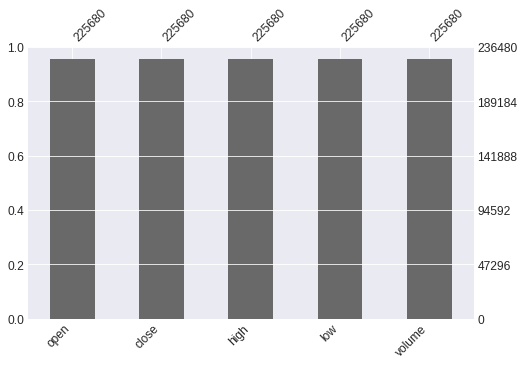

In [ ]:
msno.bar(df_group1, figsize=(8,5), fontsize=12);

Obtenemos la matriz para visualizar la distribución de los **valores faltantes** para el conjunto de datos en general.
Podemos ver que todas las columnas tienen una distribución similar.

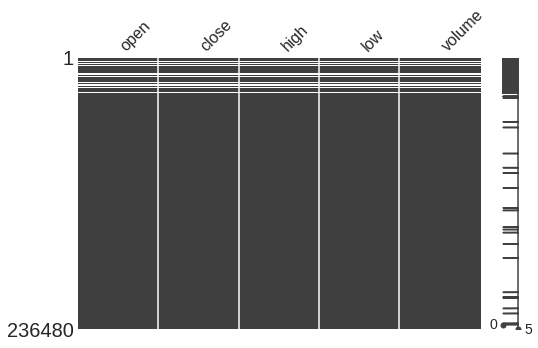

In [ ]:
msno.matrix(df_group1,figsize=(8, 5))

Obtenemos la cantidad de nulos en este conjunto de datos para cada activo.

In [ ]:
df_group1.groupby(['cripto_activo']).agg({'open': lambda x: x.isnull().sum(),'close': lambda x: x.isnull().sum(),'high': lambda x: x.isnull().sum(),'low': lambda x: x.isnull().sum(),'volume': lambda y: y.isnull().sum()})

,open,close,high,low,volume
cripto_activo,,,,,
ADAUSDT,2631.0,2631.0,2631.0,2631.0,2631.0
BNBUSDT,116.0,116.0,116.0,116.0,116.0
BTCUSDT,116.0,116.0,116.0,116.0,116.0
EOSUSDT,3616.0,3616.0,3616.0,3616.0,3616.0
ETCUSDT,3973.0,3973.0,3973.0,3973.0,3973.0
ETHUSDT,116.0,116.0,116.0,116.0,116.0
LTCUSDT,116.0,116.0,116.0,116.0,116.0
NEOUSDT,116.0,116.0,116.0,116.0,116.0


Podemos observar que la cantidad de faltantes coincide en todas las columnas, es decir que cuando falta el un valor en la columna "close, falta también el valor de las demás columnas correspondientes a la misma observación.

Obtenemos un **heatmap**, en el cual podemos confirmar la correlación exacta (VALOR 1) entre todas las variables, si una posee valor las demás también.

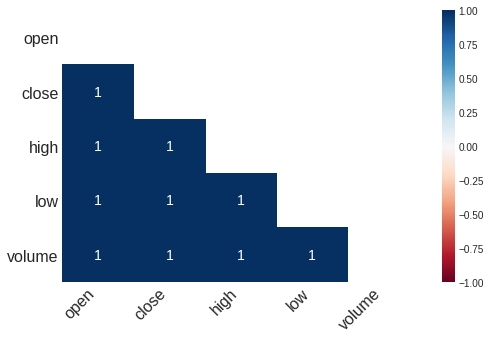

In [ ]:
msno.heatmap(df_group1,figsize=(8, 5))

Finalmente graficamos al distribución de los faltantes por activo en gral  y luego por columna por activo.

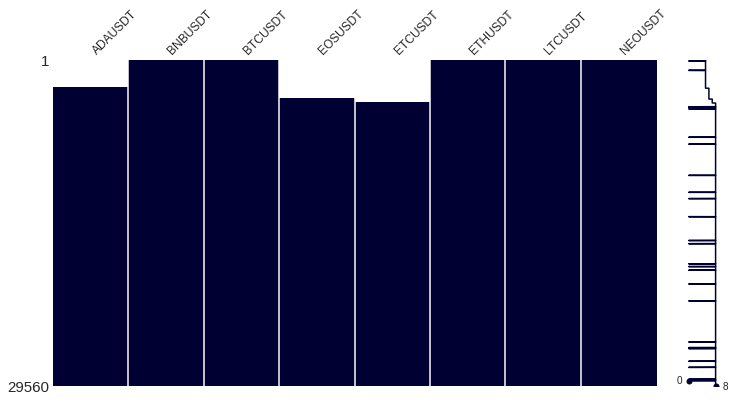

In [ ]:
df_aux=df_group1.copy()
df_aux=df_aux.reset_index(0)
df_aux=df_aux.pivot( columns='cripto_activo', values='close')

msno.matrix(df_aux,figsize=(12, 6), fontsize=12, color=[0,0,0.2])

Luego obtenemos la misma gráfica por columna para cada activo.

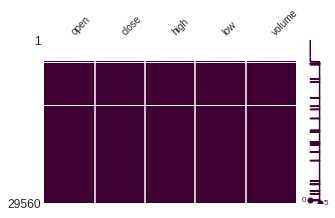

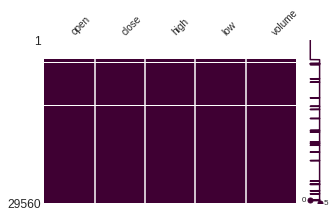

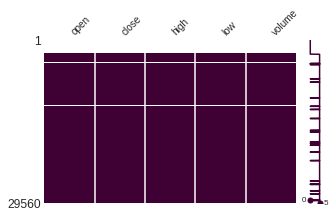

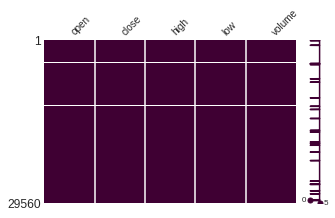

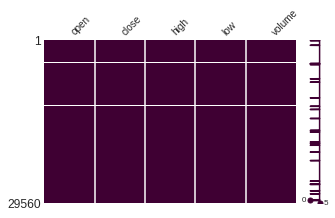

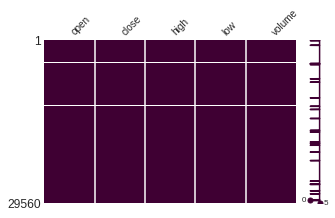

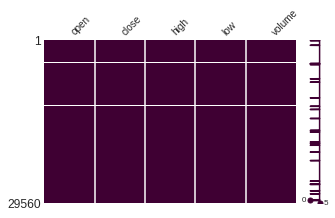

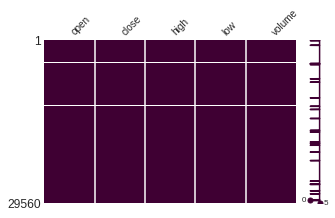

In [ ]:
for cripto in list_group1:
  msno.matrix(df_group1.loc[cripto , :],figsize=(5, 3), fontsize=10, color=[0.25,0,0.2],filter='bottom')


######**Conclusión**

Decidimos que vamos a realizar el siguiente tratamiento de estos valores faltantes para cada ACTIVO:


1.   Vamos a obtener la fecha mínima desde la cual tenemos valores del activo considerado y luego eliminaremos todas las observaciones de fechas anteriores a esa fecha minima, ya que representan VALORES INEXISTENTES.
2.   Aplicaremos el método de interpolación con elmétodo Spline para eliminar los valores NaN remanentes, ya que representan VALORES FALTANTES.



#### **Interpolación Spline para cada activo.**

Primero **seleccionamos un activo**.


In [ ]:
df_aux=df_group1.loc['ETHUSDT' , :]
lim_fecha_min=df_aux[ (pd.notnull(df_aux['close']))& (pd.notnull(df_aux['volume']))].index.min()
df_aux= df_aux.loc[(df_aux.index >= lim_fecha_min)]

Filtramos en este dataframe auxiliar un **período donde podemos observar varios valores NaN** en todas las columnas.

In [ ]:
df_to_compare=df_aux.loc['2018-06-25 18:00:00':'2018-06-27 18:00:00']
df_to_compare

,open,close,high,low,volume
date,,,,,
2018-06-25 18:00:00,463.53,462.32,465.63,456.00,3399.07490
2018-06-25 19:00:00,462.60,460.00,463.83,457.48,3725.82107
2018-06-25 20:00:00,459.86,458.68,461.99,457.82,2321.24599
2018-06-25 21:00:00,458.68,462.68,463.80,458.00,1486.69065
2018-06-25 22:00:00,463.00,460.12,463.80,457.92,1867.53559
2018-06-25 23:00:00,459.80,458.70,461.99,457.38,2242.73008
2018-06-26 00:00:00,459.04,453.33,460.81,452.07,4763.50212
2018-06-26 01:00:00,453.22,455.92,456.59,452.84,4436.64144
2018-06-26 02:00:00,NaN,NaN,NaN,NaN,NaN


A continuación **aplicamos a las columnas close y volume el método de interpolación Spline con diferentes ordenes y el metodo quadratic**

In [ ]:
df_to_compare = df_to_compare.assign(CloseSpline1=df_to_compare.close.interpolate(method='spline', order=1))
df_to_compare= df_to_compare.assign(CloseSpline2=df_to_compare.close.interpolate(method='spline', order=2))
df_to_compare= df_to_compare.assign(Closequadratic=df_to_compare.close.interpolate(method='quadratic'))
df_to_compare = df_to_compare.assign(CloseSpline3=df_to_compare.close.interpolate(method='spline', order=3))

df_to_compare = df_to_compare.assign(VolumeSpline1=df_to_compare.volume.interpolate(method='spline', order=1))
df_to_compare= df_to_compare.assign(VolumeSpline2=df_to_compare.volume.interpolate(method='spline', order=2))
df_to_compare= df_to_compare.assign(Volumequadratic=df_to_compare.volume.interpolate(method='quadratic'))
df_to_compare= df_to_compare.assign(VolumeSpline3=df_to_compare.volume.interpolate(method='spline', order=3))

df_to_compare

,open,close,high,low,volume,CloseSpline1,CloseSpline2,Closequadratic,CloseSpline3,VolumeSpline1,VolumeSpline2,Volumequadratic,VolumeSpline3
date,,,,,,,,,,,,,
2018-06-25 18:00:00,463.53,462.32,465.63,456.00,3399.07490,462.320000,462.320000,462.320000,462.320000,3399.074900,3399.074900,3399.074900,3399.074900
2018-06-25 19:00:00,462.60,460.00,463.83,457.48,3725.82107,460.000000,460.000000,460.000000,460.000000,3725.821070,3725.821070,3725.821070,3725.821070
2018-06-25 20:00:00,459.86,458.68,461.99,457.82,2321.24599,458.680000,458.680000,458.680000,458.680000,2321.245990,2321.245990,2321.245990,2321.245990
2018-06-25 21:00:00,458.68,462.68,463.80,458.00,1486.69065,462.680000,462.680000,462.680000,462.680000,1486.690650,1486.690650,1486.690650,1486.690650
2018-06-25 22:00:00,463.00,460.12,463.80,457.92,1867.53559,460.120000,460.120000,460.120000,460.120000,1867.535590,1867.535590,1867.535590,1867.535590
2018-06-25 23:00:00,459.80,458.70,461.99,457.38,2242.73008,458.700000,458.700000,458.700000,458.700000,2242.730080,2242.730080,2242.730080,2242.730080
2018-06-26 00:00:00,459.04,453.33,460.81,452.07,4763.50212,453.330000,453.330000,453.330000,453.330000,4763.502120,4763.502120,4763.502120,4763.502120
2018-06-26 01:00:00,453.22,455.92,456.59,452.84,4436.64144,455.920000,455.920000,455.920000,455.920000,4436.641440,4436.641440,4436.641440,4436.641440
2018-06-26 02:00:00,NaN,NaN,NaN,NaN,NaN,454.664392,461.233520,459.424507,457.073863,4656.272774,3775.565638,3775.133343,3656.206157


**Graficamos la serie original y las columnas de valores interpolados**

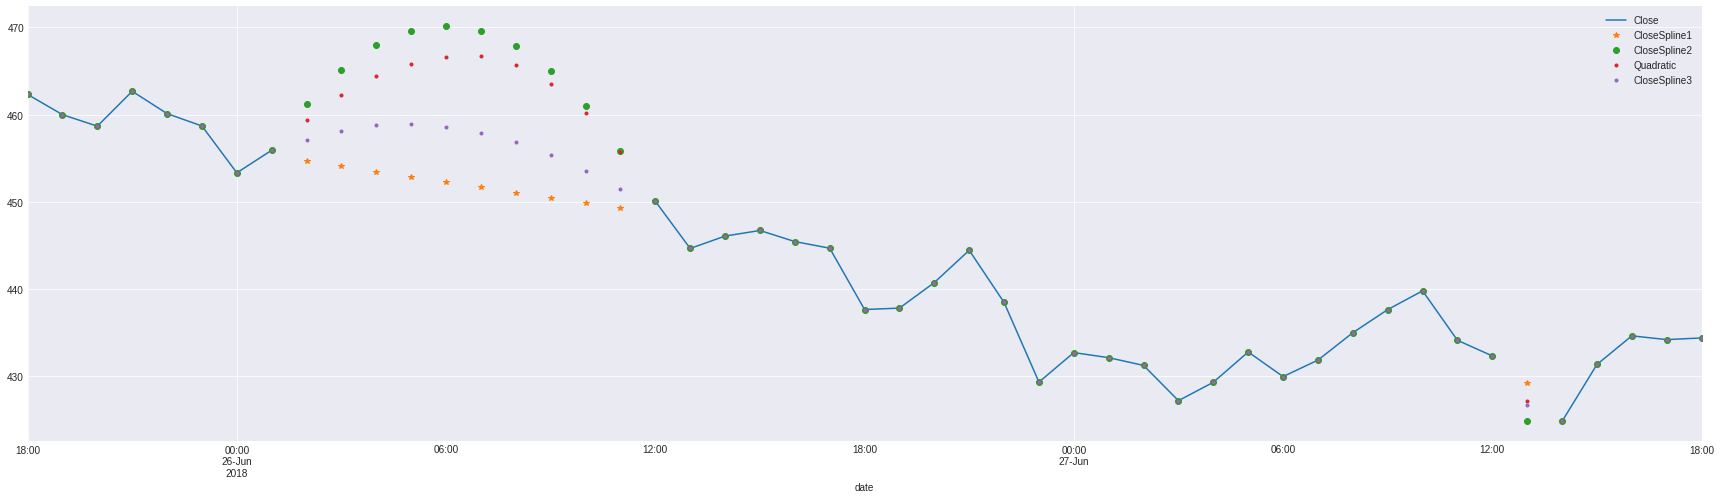

In [ ]:
df_to_compare.close.plot(legend=True,label='Close',figsize=(30, 8))
df_to_compare.CloseSpline1.plot(style = '*',legend=True,label='CloseSpline1')
df_to_compare.CloseSpline2.plot(style = 'o',legend=True,label='CloseSpline2')
df_to_compare.Closequadratic.plot(style = '.',legend=True,label='Quadratic')
df_to_compare.CloseSpline3.plot(style = '.',legend=True,label='CloseSpline3')



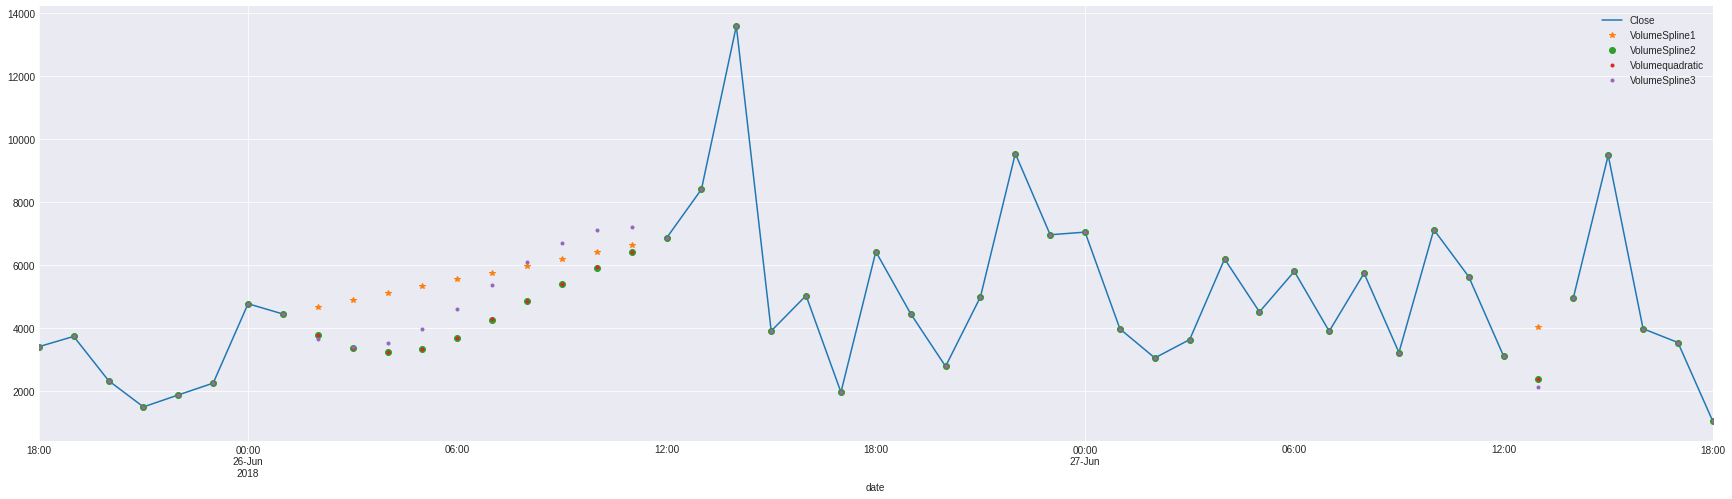

In [ ]:
df_to_compare.volume.plot(legend=True,label='Close',figsize=(30, 8))
df_to_compare.VolumeSpline1.plot(style = '*',legend=True,label='VolumeSpline1')
df_to_compare.VolumeSpline2.plot(style = 'o',legend=True,label='VolumeSpline2')
df_to_compare.Volumequadratic.plot(style = '.',legend=True,label='Volumequadratic')
df_to_compare.VolumeSpline3.plot(style = '.',legend=True,label='VolumeSpline3')

**De lo observado en las gráficas anteriores, decimos utilizar el spline de orden 2 o el metodo quadratic en todas las columnas.**.

Debido a lo mucho que demora el spline de orden 2 y que los resultados son muy similares al quadratic, decidimos utilizar quadratic

En la siguiente celda realizamos el tratamiento indicado anteriormente y conformamos el dataframe del grupo 1 de monedas, ya sin valores NaN.

In [ ]:
df_columns=['open',	'close'	,'high',	'low'	,'volume',	'cripto_activo']

df_first=pd.DataFrame(columns=df_columns)

for activo in list_group1:
   df_cripto=df_group1.loc[activo , :]
   lim_fecha_min=df_cripto[ (pd.notnull(df_cripto['close']))& (pd.notnull(df_cripto['volume']))].index.min()
   df_cripto= df_cripto.loc[(df_cripto.index >= lim_fecha_min)]
   df_cripto['open']=df_cripto['open'].interpolate(method='quadratic')
   df_cripto['close']=df_cripto['close'].interpolate(method='quadratic')
   df_cripto['high']=df_cripto['high'].interpolate(method='quadratic')
   df_cripto['low']=df_cripto['low'].interpolate(method='quadratic')
   df_cripto['volume']=df_cripto['volume'].interpolate(method='quadratic')
   df_cripto.loc[:,'cripto_activo']=activo
   df_first = pd.concat([df_first,df_cripto],axis=0)   


In [ ]:
df_first[:50]

,open,close,high,low,volume,cripto_activo
2018-06-12 02:00:00,16.2000,15.5300,16.3000,15.3600,22867.56,ETCUSDT
2018-06-12 03:00:00,15.5288,15.2300,16.7999,15.0386,48398.68,ETCUSDT
2018-06-12 04:00:00,15.2300,15.6002,15.7515,15.2000,31377.59,ETCUSDT
2018-06-12 05:00:00,15.6002,16.1502,16.3000,15.6002,50812.82,ETCUSDT
2018-06-12 06:00:00,16.2498,15.6833,16.3000,15.5068,48870.17,ETCUSDT
2018-06-12 07:00:00,15.7173,15.6582,15.9173,15.3917,28034.59,ETCUSDT
2018-06-12 08:00:00,15.6851,15.7721,15.7900,15.5479,19387.04,ETCUSDT
2018-06-12 09:00:00,15.7553,15.6714,15.7798,15.4799,30009.51,ETCUSDT
2018-06-12 10:00:00,15.6713,15.5300,15.7100,15.4802,13395.17,ETCUSDT
2018-06-12 11:00:00,15.5290,15.4000,15.5700,15.2816,27658.44,ETCUSDT


Verificamos que no hay valores NaN.

In [ ]:
df_first.groupby(['cripto_activo']).agg({'open': lambda v: v.isnull().sum(),'close': lambda w: w.isnull().sum(),'high': lambda x: x.isnull().sum(),'low': lambda y: y.isnull().sum(),'volume': lambda z: z.isnull().sum()})

,open,close,high,low,volume
cripto_activo,,,,,
ADAUSDT,0.0,0.0,0.0,0.0,0.0
BNBUSDT,0.0,0.0,0.0,0.0,0.0
BTCUSDT,0.0,0.0,0.0,0.0,0.0
EOSUSDT,0.0,0.0,0.0,0.0,0.0
ETCUSDT,0.0,0.0,0.0,0.0,0.0
ETHUSDT,0.0,0.0,0.0,0.0,0.0
LTCUSDT,0.0,0.0,0.0,0.0,0.0
NEOUSDT,0.0,0.0,0.0,0.0,0.0


Seteamos nuevamente el multiindex en nuestro dataframe definitivo, post tratamiento de valores faltantes.

In [ ]:
# Set multi index
df_first=df_first.reset_index()
df_first.rename(columns={'index':'date'},inplace=True)
df_first.set_index(['cripto_activo','date'],inplace=True)

df_first

open    close  ...      low     volume
cripto_activo date                                    ...                    
ETCUSDT       2018-06-12 02:00:00   16.2000  15.5300  ...  15.3600  22867.560
              2018-06-12 03:00:00   15.5288  15.2300  ...  15.0386  48398.680
              2018-06-12 04:00:00   15.2300  15.6002  ...  15.2000  31377.590
              2018-06-12 05:00:00   15.6002  16.1502  ...  15.6002  50812.820
              2018-06-12 06:00:00   16.2498  15.6833  ...  15.5068  48870.170
...                                     ...      ...  ...      ...        ...
NEOUSDT       2021-05-16 11:00:00  101.1990  98.8840  ...  98.5130  60567.794
              2021-05-16 12:00:00   98.9110  97.0970  ...  96.5650  45624.293
              2021-05-16 13:00:00   97.0770  98.0900  ...  97.0520  30851.648
              2021-05-16 14:00:00   98.1050  96.5300  ...  96.3500  31804.948
              2021-05-16 15:00:00   96.5300  96.2000  ...  94.7860  28159.743

[226509 rows x 5 columns]

In [ ]:
try:
  from google.colab import drive
  drive.mount('drive', force_remount=True)
  df_first.to_csv('first_group.csv', index = False)
  !cp first_group.csv "drive/My Drive/Diplomatura de Ciencia de Datos/"
  #"drive/Shared with me/Mentoría Cripto Activos Grupo 2/Curación/TP2_Analisis_y_Curacion/"
 
except:
   df_first.to_csv(r'C:\Users\qubits\Documents\DIPLODATOS-MENTORIA\first_group.csv')

Mounted at drive


####**Dispersión en Retardos ACTIVO X**

Elegimos una moneda y graficamos los retardos 

In [ ]:
df_aux=df_first.loc['ETHUSDT' , :]

In [ ]:
df_aux = df_aux.assign(CloseRetardo1=df_aux.close.shift(1))
df_aux = df_aux.assign(CloseRetardo2=df_aux.close.shift(2))
df_aux = df_aux.assign(CloseRetardo3=df_aux.close.shift(3))
df_aux = df_aux.assign(CloseRetardo4=df_aux.close.shift(4))

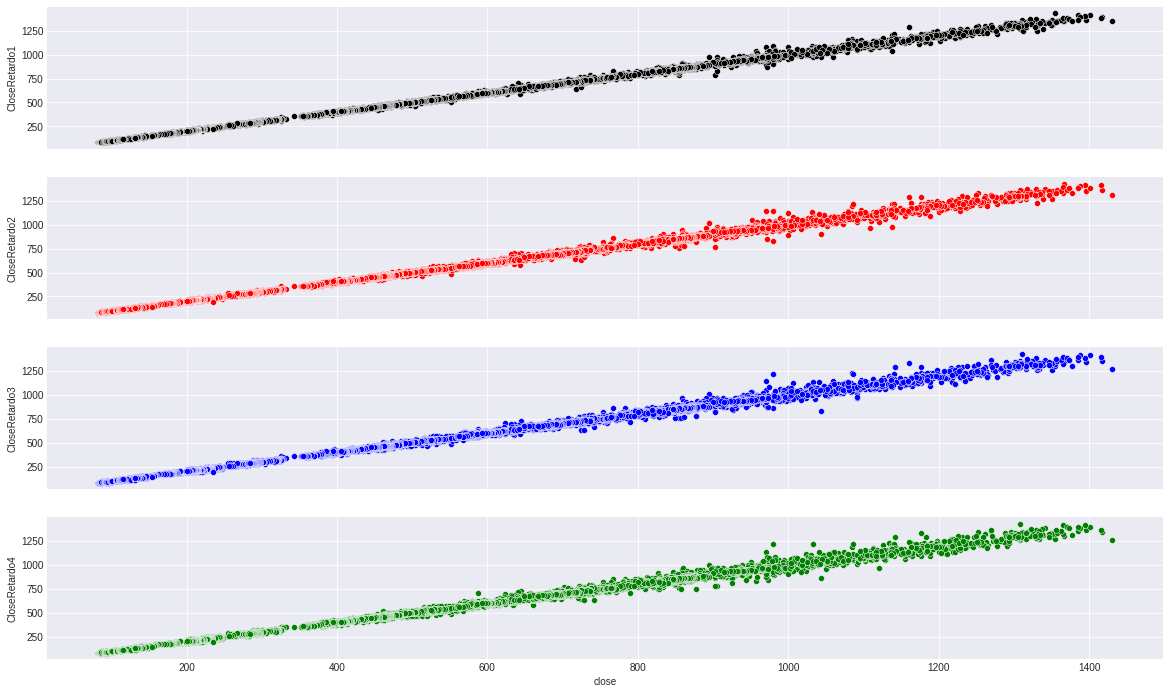

In [ ]:
fig, axes = plt.subplots(figsize=(20, 12), nrows=4,sharex=True)

sns.scatterplot(data=df_aux.loc['2018':'2018'], x='close', y='CloseRetardo1', color='black', ax=axes[0])
sns.scatterplot(data=df_aux.loc['2018':'2018'], x='close', y='CloseRetardo2', color='red', ax=axes[1])
sns.scatterplot(data=df_aux.loc['2018':'2018'], x='close', y='CloseRetardo3', color='blue', ax=axes[2])
sns.scatterplot(data=df_aux.loc['2018':'2018'], x='close', y='CloseRetardo4', color='green',ax=axes[3])

####**ACF Autocorrelación**

Un modelo de autorregresión predice el valor actual basándose en valores pasados. Eso significa que el modelo asume que los valores pasados ​​de la serie temporal están afectando su valor actual. A esto se le llama autocorrelación.

El valor de autocorrelación se encuentra entre -1 y +1.

*   -1 significa una autocorrelación negativa perfecta,
*   +1 significa una autocorrelación positiva perfecta, y
*   0 significa que no hay autocorrelación.

Como la autocorrelación mide la relación entre el valor actual y el valor pasado de los datos, es muy útil para medir la aleatoriedad de los datos. 

Esta aleatoriedad en los datos se puede detectar utilizando el gráfico de la función de autocorrelación (ACF). Para datos no aleatorios, el valor de la autocorrelación para al menos un término rezagado sería estadísticamente significativo (significativamente distinto de cero y fuera del área de confianza). Sin embargo, la autocorrelación cero para todos los términos rezagados no significa necesariamente datos aleatorios y viceversa.

#### **PACF Autocorrelación parcial**

La autocorrelación parcial es la correlación condicional entre la variable y su valor rezagado. Eso significa que la autocorrelación parcial entre el valor actual de la serie de tiempo, yt y su valor rezagado yt-h sería la correlación condicional entre yt e yt-h, condicionada a todos los términos de rezago entre t y th, es decir, yt- 1, yt-2, ..., yt-h + 1. Esto significa que, a diferencia de los valores de autocorrelación, los valores de autocorrelación parcial controlan los otros órdenes de retraso e ignoran su efecto.

Se utiliza un gráfico de función de autocorrelación parcial (PACF) para identificar el orden del modelo de autorregresión.

#####**COLUMNA CLOSE**

######**Test ADF**

Como se puede usar el modelo AR solo con datos estacionarios, primero verifiquemos si el precio de las cripto monedas es estacionario o no. 
Para esto hacemos una **prueba ADF** (adfuller).

In [ ]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = timeseries.rolling(24*30).mean()
    rolstd = timeseries.rolling(24*30).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(20, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

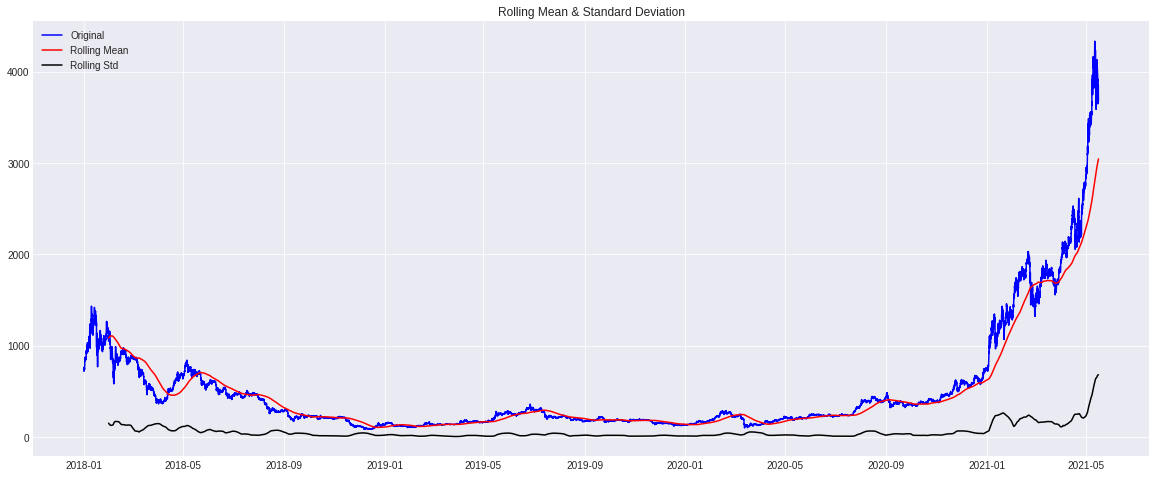

Results of Dickey-Fuller Test:
Test Statistic                     4.237192
p-value                            1.000000
#Lags Used                        50.000000
Number of Observations Used    29509.000000
Critical Value (1%)               -3.430572
Critical Value (5%)               -2.861638
Critical Value (10%)              -2.566822
dtype: float64


In [ ]:
test_stationarity(df_first.loc['ETHUSDT' , :]['close'])

El P-value es 1, por lo tanto, existe una probabilidad del 100% de que nuestra serie temporal sea no estacionaria.
Luego, dado que el valor de la prueba (3.90) es mayor que todos los valores críticos, entonces la hipótesis nula en la que se evalúa que en nuestra serie temporal existe una raíz unitaria, no puede ser rechazada, y por ello, concluimos que estamos ante una **serie temporal no estacionaria**.

######**Transformación Serie No estacionaria en Estacionaria usando Diferenciación**

Debido que la serie es NO estacionaria, necesitamos aplicar la diferenciación para transformarla la serie en estacionaria. 

In [ ]:
data=df_first.loc['ETHUSDT' , :]

Agregamos una columna la dataframe con la diferencia.

In [ ]:
data = data.assign(Difference=data.close.diff())
data


,open,close,high,low,volume,Difference
date,,,,,,
2018-01-01 00:00:00,733.01,727.62,734.52,720.03,2105.90100,NaN
2018-01-01 01:00:00,727.01,717.97,732.00,716.80,2305.97086,-9.65
2018-01-01 02:00:00,717.67,724.05,725.75,717.59,2166.45725,6.08
2018-01-01 03:00:00,723.95,734.50,737.99,722.70,2160.90450,10.45
2018-01-01 04:00:00,734.99,744.82,744.98,730.01,2335.33705,10.32
...,...,...,...,...,...,...
2021-05-16 11:00:00,3848.25,3789.69,3849.76,3786.43,21628.84918,-58.57
2021-05-16 12:00:00,3789.98,3707.51,3804.49,3693.99,52499.30380,-82.18
2021-05-16 13:00:00,3707.87,3728.01,3730.91,3675.51,62027.76771,20.50


Eliminamos el valor NaN en la columna Difference de la primer observación.

In [ ]:
data=data.dropna()
data[:20]

,open,close,high,low,volume,Difference
date,,,,,,
2018-01-01 01:00:00,727.01,717.97,732.00,716.80,2305.97086,-9.65
2018-01-01 02:00:00,717.67,724.05,725.75,717.59,2166.45725,6.08
2018-01-01 03:00:00,723.95,734.50,737.99,722.70,2160.90450,10.45
2018-01-01 04:00:00,734.99,744.82,744.98,730.01,2335.33705,10.32
2018-01-01 05:00:00,744.78,748.99,750.00,742.08,2289.19266,4.17
2018-01-01 06:00:00,748.91,762.18,762.18,746.21,2504.12876,13.19
2018-01-01 07:00:00,762.18,751.99,763.55,750.00,2363.68887,-10.19
2018-01-01 08:00:00,751.77,745.00,758.10,737.40,2384.46369,-6.99
2018-01-01 09:00:00,744.08,753.21,755.00,744.08,1817.60549,8.21


Aplicamos a esta nueva columna la prueba ADF.

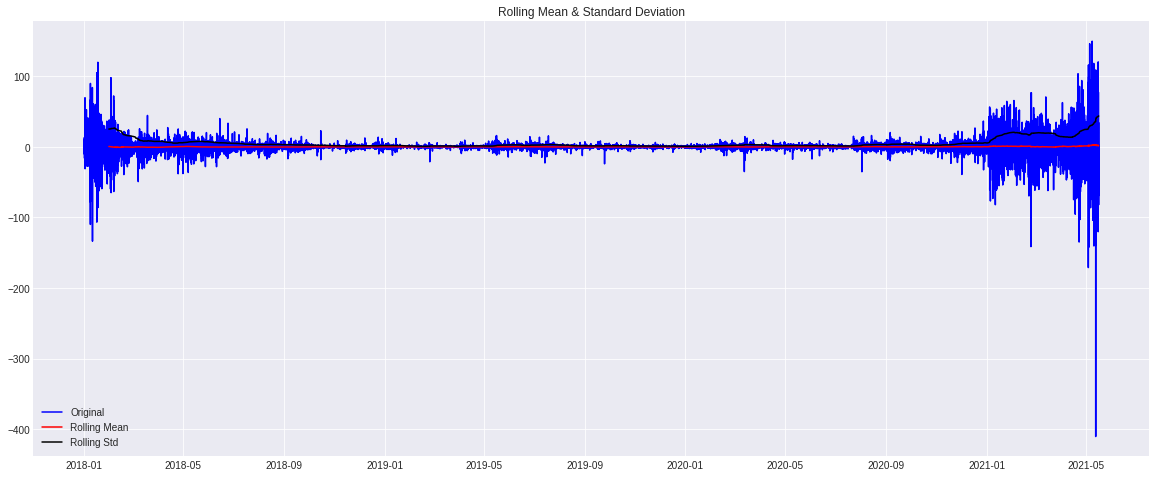

Results of Dickey-Fuller Test:
Test Statistic                   -24.194162
p-value                            0.000000
#Lags Used                        50.000000
Number of Observations Used    29508.000000
Critical Value (1%)               -3.430572
Critical Value (5%)               -2.861638
Critical Value (10%)              -2.566822
dtype: float64


In [ ]:
test_stationarity(data.Difference)

El P-value es 0, por lo tanto, existe una probabilidad del 0% de que nuestra serie temporal sea no estacionaria. Luego, dado que el valor de la prueba es menor que todos los valores críticos, entonces la hipótesis nula en la que se evalúa que en nuestra serie temporal existe una raíz unitaria, SI puede ser rechazada, y por ello, concluimos que estamos ante una **serie temporal estacionaria**.

###### **GRAFICO ACF columna Difference**

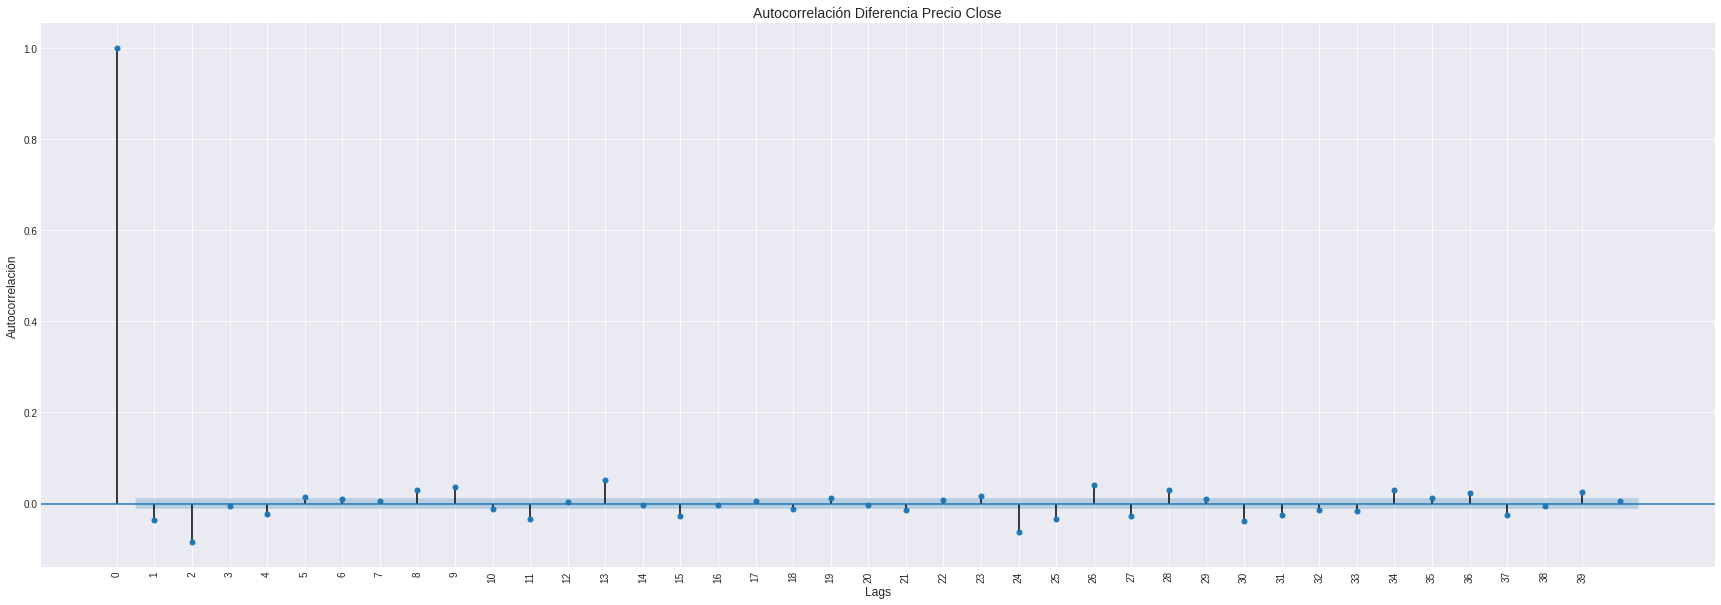

In [ ]:
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf

plt.rc("figure", figsize=(30, 10))
plt.style.use('seaborn-darkgrid')
plot_acf(data['Difference'], lags=40)
plt.xlabel('Lags', fontsize=12)
plt.xticks(np.arange(0,40,step=1))
plt.xticks(rotation=90)
plt.ylabel('Autocorrelación', fontsize=12)
plt.title('Autocorrelación Diferencia Precio Close', fontsize=14)
pyplot.show()

En el gráfico anterior, puede ver que el valor de autocorrelación en el retardo 0 es 1 (ya que es la correlación de la variable consigo misma).

La región azul es la banda de confianza y la autocorrelación hasta el retraso 10 se encuentra fuera de esta región azul. Esto significa que los valores hasta el rezago 10 son estadísticamente significativos, es decir, afectan el precio actual. 


###### **GRAFICO PACF columna Difference**

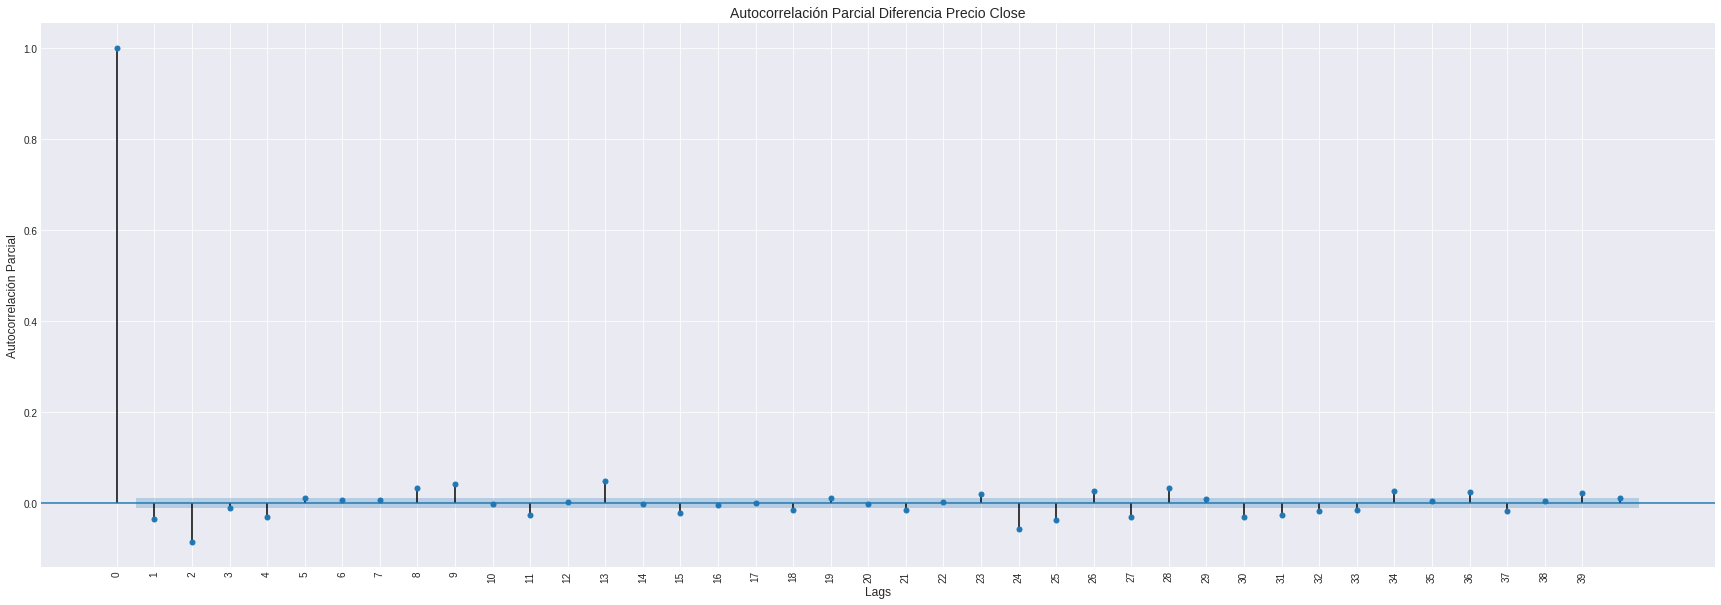

In [ ]:
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_pacf

plt.rc("figure", figsize=(30,10))
plt.style.use('seaborn-darkgrid')
plot_pacf(data['Difference'], lags=40)
plt.xlabel('Lags', fontsize=12)
plt.xticks(np.arange(0,40,step=1))
plt.xticks(rotation=90)
plt.ylabel('Autocorrelación Parcial', fontsize=12)
plt.title('Autocorrelación Parcial Diferencia Precio Close', fontsize=14)
pyplot.show()

#####**COLUMNA VOLUME**

######**Test ADF**

Como se puede usar el modelo AR solo con datos estacionarios, primero verifiquemos si el volumen de las cripto monedas es estacionario o no. 
Para esto hacemos una **prueba ADF** (adfuller).

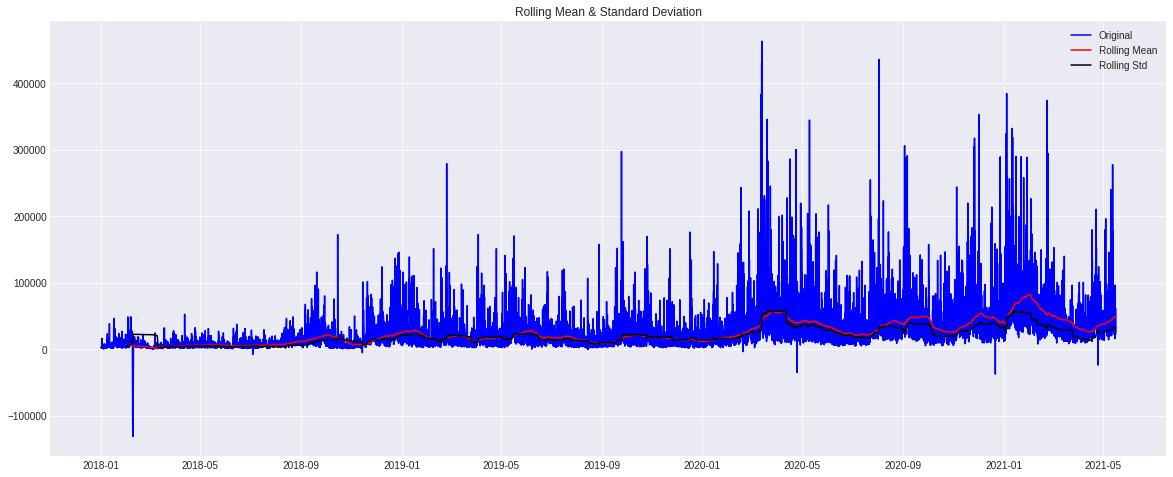

Results of Dickey-Fuller Test:
Test Statistic                -9.931675e+00
p-value                        2.812149e-17
#Lags Used                     4.800000e+01
Number of Observations Used    2.951100e+04
Critical Value (1%)           -3.430572e+00
Critical Value (5%)           -2.861638e+00
Critical Value (10%)          -2.566822e+00
dtype: float64


In [ ]:
test_stationarity(df_first.loc['ETHUSDT' , :]['volume'])

El P-value es un valor muy cercano a 0 (2.812290e-17), por lo tanto, existe una probabilidad casi nula de que nuestra serie temporal sea no estacionaria.
Luego, dado que el valor de la prueba es menor que todos los valores críticos, entonces la hipótesis nula en la que se evalúa que en nuestra serie temporal existe una raíz unitaria, SI puede ser rechazada, y por ello, concluimos que estamos ante una **serie temporal estacionaria**.

###### **GRAFICO ACF**

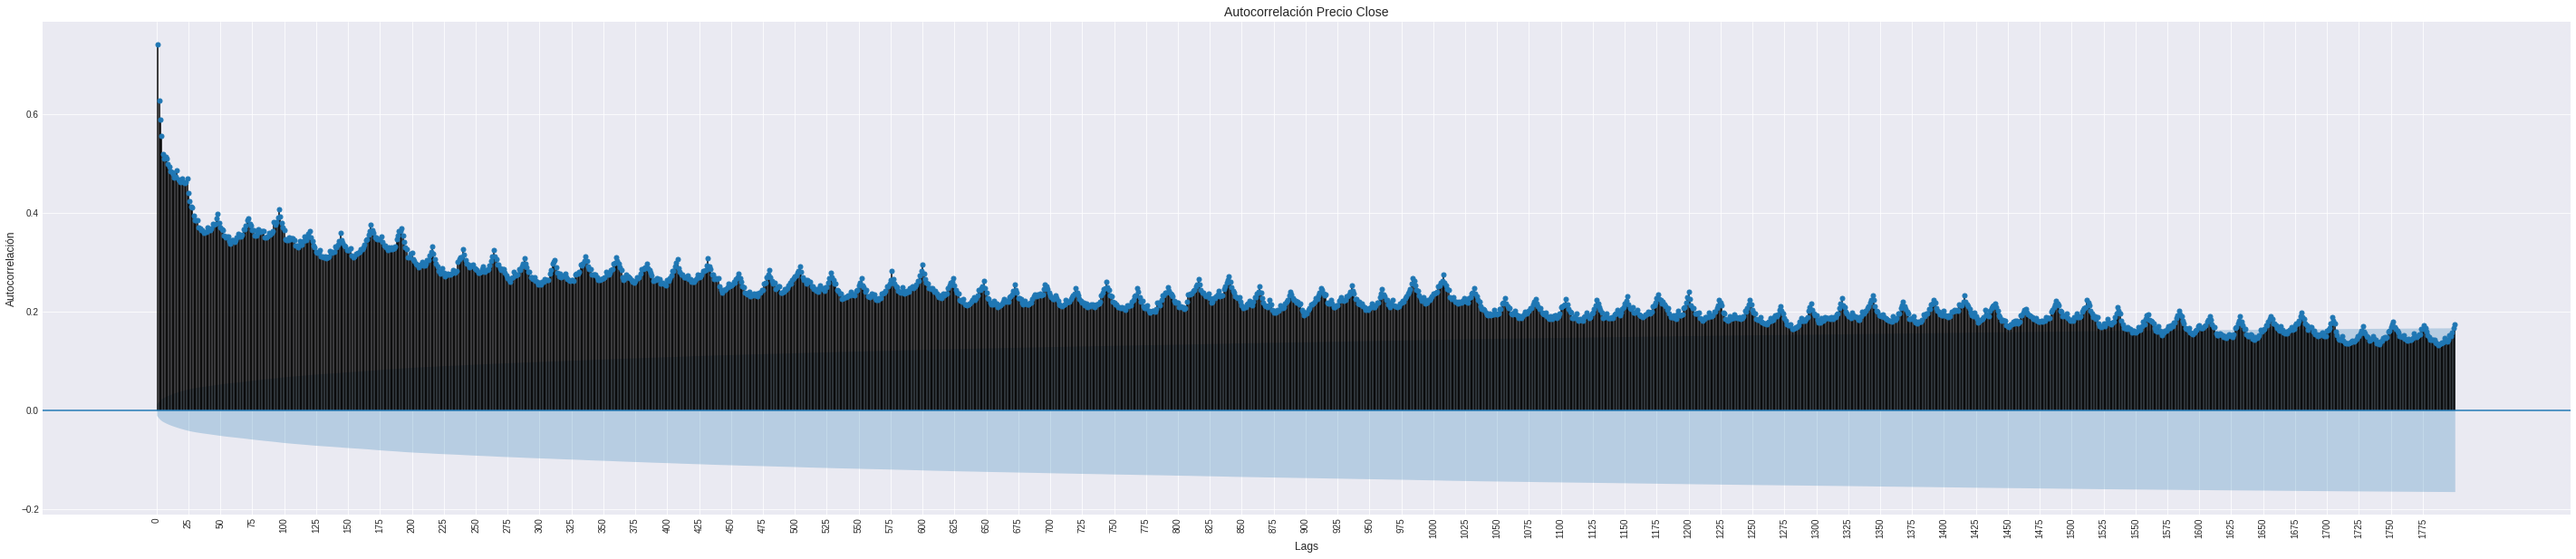

In [ ]:
plt.rc("figure", figsize=(50, 10))
plt.style.use('seaborn-darkgrid')
plot_acf(data['volume'], lags=1800,zero=False)
plt.xlabel('Lags', fontsize=12)
plt.xticks(np.arange(0,1800,step=25))
plt.xticks(rotation=90)
plt.ylabel('Autocorrelación', fontsize=12)
plt.title('Autocorrelación Precio Close', fontsize=14)
pyplot.show()

En el gráfico anterior, puede ver que el valor de autocorrelación en el retardo 0 es 1 (ya que es la correlación de la variable consigo misma).

La región azul es la banda de confianza y la autocorrelación hasta el retraso 1525 se encuentra fuera de esta región azul. Esto significa que los valores hasta el rezago 1525 son estadísticamente significativos, es decir, afectan el volumen actual.

Además, la autocorrelación se acerca gradualmente a cero a medida que aumenta el término de retraso. Esto significa que cuanto más avanzamos, menor es la correlación.

###### **GRAFICO PACF**

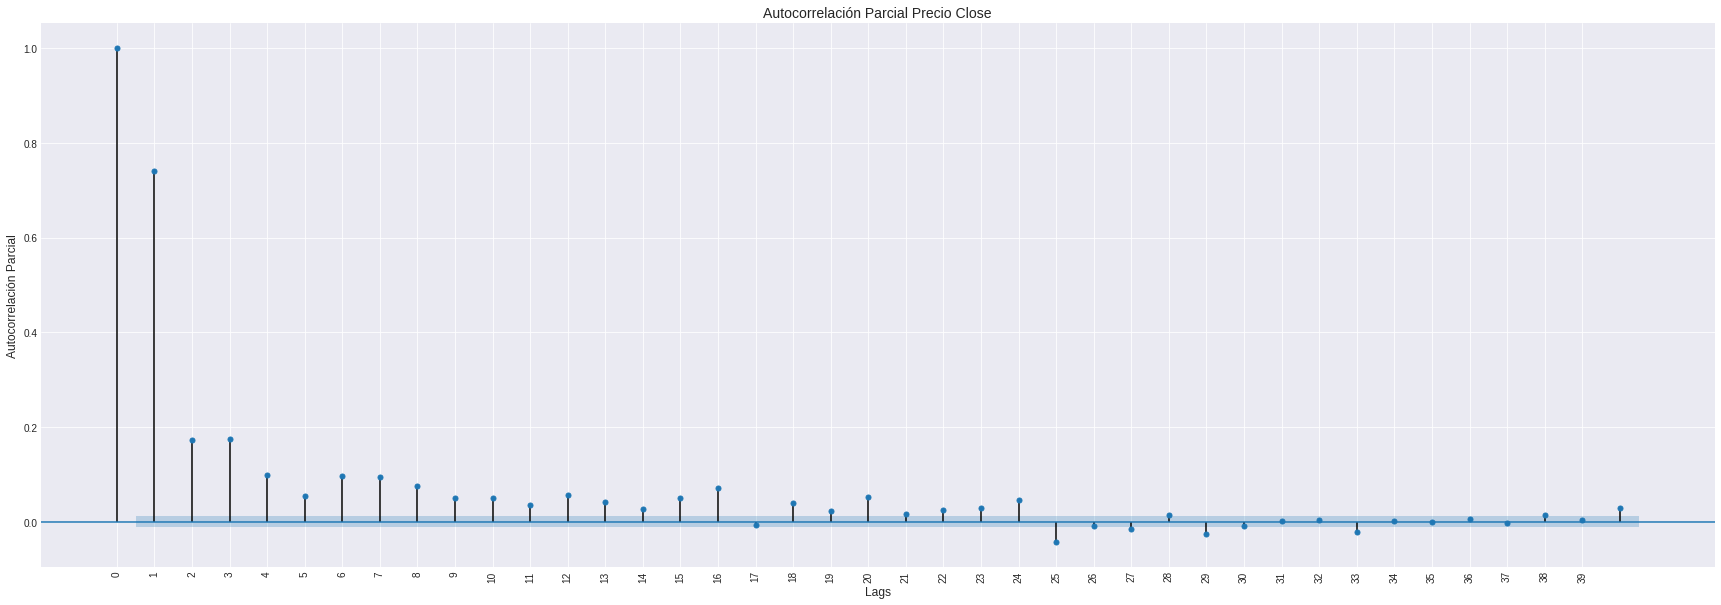

In [ ]:
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_pacf

plt.rc("figure", figsize=(30,10))
plt.style.use('seaborn-darkgrid')
plot_pacf(data['volume'], lags=40)
plt.xlabel('Lags', fontsize=12)
plt.xticks(np.arange(0,40,step=1))
plt.xticks(rotation=90)
plt.ylabel('Autocorrelación Parcial', fontsize=12)
plt.title('Autocorrelación Parcial Precio Close', fontsize=14)
pyplot.show()

###SEGUNDO DATAFRAME

In [ ]:
#Creo dataframe con el primer grupo de monedas                                                                         
for c in list_group2:                                                                       
  dfcripto=pd.read_csv(url2 + c+'.csv',index_col=0, parse_dates=True, dayfirst=True)
  dfcripto.loc[:,'cripto_activo']=c
  df_group2 = pd.concat([df_group2,dfcripto],axis=0)



In [ ]:
 df_group2= df_group2.loc[(df_group2.index > '2019-01-16 09:00:00')]


In [ ]:
df_group2[:10]

,open,close,high,low,volume,cripto_activo
2019-01-16 10:00:00,NaN,NaN,NaN,NaN,NaN,AAVEUSDT
2019-01-16 11:00:00,NaN,NaN,NaN,NaN,NaN,AAVEUSDT
2019-01-16 12:00:00,NaN,NaN,NaN,NaN,NaN,AAVEUSDT
2019-01-16 13:00:00,NaN,NaN,NaN,NaN,NaN,AAVEUSDT
2019-01-16 14:00:00,NaN,NaN,NaN,NaN,NaN,AAVEUSDT
2019-01-16 15:00:00,NaN,NaN,NaN,NaN,NaN,AAVEUSDT
2019-01-16 16:00:00,NaN,NaN,NaN,NaN,NaN,AAVEUSDT
2019-01-16 17:00:00,NaN,NaN,NaN,NaN,NaN,AAVEUSDT
2019-01-16 18:00:00,NaN,NaN,NaN,NaN,NaN,AAVEUSDT
2019-01-16 19:00:00,NaN,NaN,NaN,NaN,NaN,AAVEUSDT


Reordenamos el indice del dataframe.

In [ ]:
df_group2=df_group2.sort_index()

In [ ]:
df_group2[:10]

,open,close,high,low,volume,cripto_activo
2019-01-16 10:00:00,NaN,NaN,NaN,NaN,NaN,AAVEUSDT
2019-01-16 10:00:00,NaN,NaN,NaN,NaN,NaN,MKRUSDT
2019-01-16 10:00:00,NaN,NaN,NaN,NaN,NaN,COMPUSDT
2019-01-16 10:00:00,0.5355,0.5066,0.5355,0.5003,63365.33,LINKUSDT
2019-01-16 10:00:00,NaN,NaN,NaN,NaN,NaN,DASHUSDT
2019-01-16 10:00:00,NaN,NaN,NaN,NaN,NaN,XMRUSDT
2019-01-16 10:00:00,NaN,NaN,NaN,NaN,NaN,BCHUSDT
2019-01-16 10:00:00,NaN,NaN,NaN,NaN,NaN,DOTUSDT
2019-01-16 11:00:00,NaN,NaN,NaN,NaN,NaN,XMRUSDT
2019-01-16 11:00:00,NaN,NaN,NaN,NaN,NaN,AAVEUSDT


Seteamos un multi index.

In [ ]:
# Set multi index
df_group2=df_group2.reset_index()
df_group2.rename(columns={'index':'date'},inplace=True)
df_group2.set_index(['cripto_activo','date'],inplace=True)

df_group2


,,open,close,high,low,volume
cripto_activo,date,,,,,
AAVEUSDT,2019-01-16 10:00:00,NaN,NaN,NaN,NaN,NaN
MKRUSDT,2019-01-16 10:00:00,NaN,NaN,NaN,NaN,NaN
COMPUSDT,2019-01-16 10:00:00,NaN,NaN,NaN,NaN,NaN
LINKUSDT,2019-01-16 10:00:00,0.5355,0.5066,0.5355,0.5003,63365.33000
DASHUSDT,2019-01-16 10:00:00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
MKRUSDT,2021-05-16 15:00:00,4689.8500,4668.4700,4697.7900,4620.8500,104.68890
DOTUSDT,2021-05-16 15:00:00,43.8890,43.3250,44.0390,42.9630,787624.19300
AAVEUSDT,2021-05-16 15:00:00,523.1800,519.1600,524.2000,510.0000,11338.93040


Obtenemos la cantidad de nulos en este conjunto de datos para cada activo.

In [ ]:
df_group2.groupby(['cripto_activo']).agg({'open': lambda x: x.isnull().sum(),'close': lambda x: x.isnull().sum(),'high': lambda x: x.isnull().sum(),'low': lambda x: x.isnull().sum(),'volume': lambda y: y.isnull().sum()})

,open,close,high,low,volume
cripto_activo,,,,,
AAVEUSDT,15319.0,15319.0,15319.0,15319.0,15319.0
BCHUSDT,7610.0,7610.0,7610.0,7610.0,7610.0
COMPUSDT,12637.0,12637.0,12637.0,12637.0,12637.0
DASHUSDT,1747.0,1747.0,1747.0,1747.0,1747.0
DOTUSDT,13947.0,13947.0,13947.0,13947.0,13947.0
LINKUSDT,56.0,56.0,56.0,56.0,56.0
MKRUSDT,13314.0,13314.0,13314.0,13314.0,13314.0
XMRUSDT,1436.0,1436.0,1436.0,1436.0,1436.0


#### **Interpolación  para cada activo.**

In [ ]:
df_columns=['open',	'close'	,'high',	'low'	,'volume',	'cripto_activo']

df_second=pd.DataFrame(columns=df_columns)

for activo in list_group2:
   df_cripto=df_group2.loc[activo , :]
   lim_fecha_min=df_cripto[ (pd.notnull(df_cripto['close']))& (pd.notnull(df_cripto['volume']))].index.min()
   df_cripto= df_cripto.loc[(df_cripto.index >= lim_fecha_min)]
   df_cripto['open']=df_cripto['open'].interpolate(method='quadratic', order=2)
   df_cripto['close']=df_cripto['close'].interpolate(method='quadratic', order=2)
   df_cripto['high']=df_cripto['high'].interpolate(method='quadratic', order=2)
   df_cripto['low']=df_cripto['low'].interpolate(method='quadratic', order=2)
   df_cripto['volume']=df_cripto['volume'].interpolate(method='quadratic', order=2)
   df_cripto.loc[:,'cripto_activo']=activo
   df_second = pd.concat([df_second,df_cripto],axis=0)  

In [ ]:
df_second[:20]

,open,close,high,low,volume,cripto_activo
2020-10-15 03:00:00,51.430,47.099,59.000,46.437,13042.026,AAVEUSDT
2020-10-15 04:00:00,47.097,47.486,47.916,46.158,4565.137,AAVEUSDT
2020-10-15 05:00:00,47.429,49.000,49.746,47.428,5618.395,AAVEUSDT
2020-10-15 06:00:00,49.000,49.031,49.496,48.610,1977.936,AAVEUSDT
2020-10-15 07:00:00,49.150,49.000,49.208,48.610,3338.552,AAVEUSDT
2020-10-15 08:00:00,48.901,48.654,49.446,48.000,2041.204,AAVEUSDT
2020-10-15 09:00:00,48.406,46.121,48.646,45.681,6265.761,AAVEUSDT
2020-10-15 10:00:00,46.200,44.668,47.017,44.514,8352.379,AAVEUSDT
2020-10-15 11:00:00,44.629,45.871,46.072,44.392,6280.565,AAVEUSDT
2020-10-15 12:00:00,45.871,47.246,48.482,45.800,6372.672,AAVEUSDT


Validamos la ausencia de NaN post interpolación


In [ ]:
df_second.groupby(['cripto_activo']).agg({'open': lambda x: x.isnull().sum(),'close': lambda x: x.isnull().sum(),'high': lambda x: x.isnull().sum(),'low': lambda x: x.isnull().sum(),'volume': lambda y: y.isnull().sum()})

,open,close,high,low,volume
cripto_activo,,,,,
AAVEUSDT,0.0,0.0,0.0,0.0,0.0
BCHUSDT,0.0,0.0,0.0,0.0,0.0
COMPUSDT,0.0,0.0,0.0,0.0,0.0
DASHUSDT,0.0,0.0,0.0,0.0,0.0
DOTUSDT,0.0,0.0,0.0,0.0,0.0
LINKUSDT,0.0,0.0,0.0,0.0,0.0
MKRUSDT,0.0,0.0,0.0,0.0,0.0
XMRUSDT,0.0,0.0,0.0,0.0,0.0


Seteamos nuevamente el multiindex en nuestro dataframe definitivo, post tratamiento de valores faltantes.

In [ ]:
# Set multi index
df_second=df_second.reset_index()
df_second.rename(columns={'index':'date'},inplace=True)
df_second.set_index(['cripto_activo','date'],inplace=True)

df_second

open   close    high     low      volume
cripto_activo date                                                           
AAVEUSDT      2020-10-15 03:00:00  51.430  47.099  59.000  46.437   13042.026
              2020-10-15 04:00:00  47.097  47.486  47.916  46.158    4565.137
              2020-10-15 05:00:00  47.429  49.000  49.746  47.428    5618.395
              2020-10-15 06:00:00  49.000  49.031  49.496  48.610    1977.936
              2020-10-15 07:00:00  49.150  49.000  49.208  48.610    3338.552
...                                   ...     ...     ...     ...         ...
LINKUSDT      2021-05-16 11:00:00  44.399  43.647  44.634  43.600  171286.862
              2021-05-16 12:00:00  43.663  43.021  43.896  42.973  245096.335
              2021-05-16 13:00:00  43.024  43.165  43.267  42.801  277337.619
              2021-05-16 14:00:00  43.166  42.440  43.343  42.183  312785.507
              2021-05-16 15:00:00  42.431  42.198  42.512  41.534  275260.108

[97614 rows x 5 columns]

In [ ]:
try:
  from google.colab import drive
  drive.mount('drive')
  df_second.to_csv('df_second.csv')
  !cp df_second.csv "drive/My Drive/Diplomatura de Ciencia de Datos/"
except:
  df_second.to_csv('E:\Documentos\GitHub\df_second.csv')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).
